This file is based on the content found from deeplearning.aihttps://learn.deeplearning.ai/chatgpt-prompt-eng/l

To get setup visit https://platform.openai.com

In [2]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="In the realm of codes, where logic intertwines,\nThere lies a mystical concept, oh, so fine.\nRecursion, they call it, a loop like no other,\nA twist of magic, where rules do hover.\n\nImagine a function, oh, elegant and sleek,\nSeeking its purpose with undertones, mystique.\nA call made within itself, oh, what a tale,\nUnraveling the mysteries, without prevail.\n\nLike a mirror reflecting an image, so clear,\nThe function unfolds, with no trace of fear.\nIt delves into realms, deep and profound,\nUnraveling complexities, astoundingly unbound.\n\nWith each recursive call, a new adventure begins,\nAn enchanting journey, where the magic begins.\nBut caution, dear coder, must always be your guide,\nLest you fall into the maze, where dreams and fears collide.\n\nEach recursion peels, the problem one layer at a time,\nSolving complexities, as harmony does chime.\nA loop within a loop, endless and true,\nSearching for answers, in worlds that ensue.\n\nYet, bewa

In [76]:
def get_completion(prompt, model="gpt-3.5-turbo",temperature = 0):
    messages = [{"role": "user", "content": prompt}]
    completion = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return completion.choices[0].message.content

In [5]:
print(completion.choices[0].message.content)

In the realm of codes, where logic intertwines,
There lies a mystical concept, oh, so fine.
Recursion, they call it, a loop like no other,
A twist of magic, where rules do hover.

Imagine a function, oh, elegant and sleek,
Seeking its purpose with undertones, mystique.
A call made within itself, oh, what a tale,
Unraveling the mysteries, without prevail.

Like a mirror reflecting an image, so clear,
The function unfolds, with no trace of fear.
It delves into realms, deep and profound,
Unraveling complexities, astoundingly unbound.

With each recursive call, a new adventure begins,
An enchanting journey, where the magic begins.
But caution, dear coder, must always be your guide,
Lest you fall into the maze, where dreams and fears collide.

Each recursion peels, the problem one layer at a time,
Solving complexities, as harmony does chime.
A loop within a loop, endless and true,
Searching for answers, in worlds that ensue.

Yet, beware the base case, the humblest of them all,
For without 

Write a Clear Prompt. Use delimiters to seperate sections

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [7]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

To guide a model towards the desired output and reduce irrelevant or incorrect responses, it is important to provide clear and specific instructions, which can be achieved through longer prompts that offer more clarity and context.


#### Tactic 2: Ask for a structured output
- JSON, HTML

In [8]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

{
  "books": [
    {
      "book_id": 1,
      "title": "The Enigma of Elysium",
      "author": "Evelyn Sinclair",
      "genre": "Mystery"
    },
    {
      "book_id": 2,
      "title": "Whispers in the Wind",
      "author": "Nathaniel Blackwood",
      "genre": "Fantasy"
    },
    {
      "book_id": 3,
      "title": "Echoes of the Past",
      "author": "Amelia Hart",
      "genre": "Romance"
    }
  ]
}


#### Tactic 3: Ask the model to check whether conditions are satisfied


In [9]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling.
Step 2 - Grab a cup and put a tea bag in it.
Step 3 - Once the water is hot enough, pour it over the tea bag.
Step 4 - Let it sit for a bit so the tea can steep.
Step 5 - After a few minutes, take out the tea bag.
Step 6 - If you like, add some sugar or milk to taste.
Step 7 - Enjoy your delicious cup of tea.


In [10]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


#### Tactic 4: "Few-shot" prompting

In [18]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: Resilience is like a mighty oak tree that withstands the strongest storms, bending but never breaking. It is the unwavering determination to rise again after every fall, and the ability to find strength in the face of adversity. Just as a diamond is formed under immense pressure, resilience is forged through challenges and hardships, making us stronger and more resilient in the process.


### Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [11]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
1 - Jack and Jill, siblings, go on a quest to fetch water from a hilltop well, but encounter misfortune along the way.
2 - Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent des malheurs en chemin.
3 - Jack, Jill
4 - {
    "french_summary": "Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent des malheurs en chemin.",
    "num_names": 2
}


In [12]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Jack and Jill, siblings from a charming village, go on a quest to fetch water from a hilltop well, but encounter misfortune when Jack trips on a stone and tumbles down the hill, with Jill following suit, yet they remain undeterred and continue exploring with delight.

Translation: Jack et Jill, frère et sœur d'un charmant village, partent à la recherche d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, pourtant ils restent déterminés et continuent à explorer avec joie.

Names: Jack, Jill

Output JSON: 
{
  "french_summary": "Jack et Jill, frère et sœur d'un charmant village, partent à la recherche d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, pourtant ils restent déterminés et continuent à explorer avec joie.",
  "num_names": 2
}


#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [13]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot"""

prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is correct. They correctly identified the costs for land, solar panels, and maintenance, and calculated the total cost as a function of the number of square feet.


#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [14]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

To calculate the total cost for the first year of operations, we need to add up the costs of land, solar panels, and maintenance.

1. Land cost: $100 / square foot
The cost of land is $100 multiplied by the size of the installation in square feet.

2. Solar panel cost: $250 / square foot
The cost of solar panels is $250 multiplied by the size of the installation in square feet.

3. Maintenance cost: $100,000 + $10 / square foot
The maintenance cost is a flat fee of $100,000 per year, plus $10 multiplied by the size of the installation in square feet.

Total cost: Land cost + Solar panel cost + Maintenance cost

Let's calculate the total cost using the actual solution:

Total cost = (100 * x) + (250 * x) + (100,000 + (10 * x))
           = 100x + 250x + 100,000 + 10x
           = 360x + 100,000

Is the student's solution the same as the actual solution just calculated:
No

Student grade:
Incorrect


## Model Limitations: Hallucinations
- Boie is a real company, the product name is not real.

In [19]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a technologically advanced toothbrush designed to provide a superior brushing experience. Boie is a company known for its innovative oral care products, and the AeroGlide UltraSlim Smart Toothbrush is no exception.

One of the standout features of this toothbrush is its ultra-slim design. The brush head is only 2mm thick, making it much thinner than traditional toothbrushes. This slim profile allows for better access to hard-to-reach areas of the mouth, ensuring a thorough and effective clean.

The AeroGlide UltraSlim Smart Toothbrush also incorporates smart technology. It connects to a mobile app via Bluetooth, allowing users to track their brushing habits and receive personalized recommendations for improving their oral hygiene routine. The app provides real-time feedback on brushing technique, duration, and coverage, helping users to achieve optimal oral health.

The toothbrush features soft, antimicrobial bristles made from a dura

In [21]:
prompt = f"""
Your task is to provide accurate information about a product i am looking into
to solve the problem do the following
 - first list all of the products form the company
 - then see if the product i am asking about is there.
 - if it is a product by the company provide a review. 
 - if it is not a product respond that the product doesnt exist and provide the list of actual products

The product is the AeroGlide UltraSlim Smart Toothbrush by the company Boie 
"""

response = get_completion(prompt)
print(response)

I'm sorry, but the company Boie does not offer the AeroGlide UltraSlim Smart Toothbrush. However, I can provide you with a list of their actual products:

1. Boie Toothbrush: This toothbrush features soft bristles made from BPA-free antimicrobial material. It has a durable handle and is available in various colors.

2. Boie Body Scrubber: This body scrubber is made from hypoallergenic antimicrobial material. It gently exfoliates the skin and is suitable for all skin types.

3. Boie Tongue Cleaner: Designed to remove bacteria and debris from the tongue, this tongue cleaner is made from BPA-free antimicrobial material. It has a comfortable grip for easy use.

4. Boie Floss: This floss is made from a strong, durable material that glides smoothly between teeth. It is available in a refillable dispenser for convenience.

5. Boie Travel Case: This travel case is designed to store and protect your Boie toothbrush while on the go. It is compact and lightweight.

Unfortunately, the AeroGlide Ul

# Iterative prompt Development

In [22]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [23]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. This chair is part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, all designed with a timeless mid-century aesthetic.

One of the standout features of this chair is the variety of customization options available. You can choose from several shell colors and base finishes to perfectly match your existing decor. The chair is available with either plastic back and front upholstery or full upholstery in a range of 10 fabric and 6 leather options, allowing you to create a look that is uniquely yours.

The chair is also available with or without armrests, giving you the flexibility to choose the option that best suits your needs. The base finish options include stainless steel, matte black, gloss white, or chrome, ensuring that you can find the perfect match for your space.

In terms of construction, this chair is

## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [24]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our mid-century inspired office chair, part of a stunning furniture collection. With various color and finish options, choose between plastic or full upholstery in fabric or leather. The chair features a durable aluminum base with 5 wheels and pneumatic height adjustment. Perfect for home or business use. Made in Italy.


In [25]:
len(response.split())

51

## Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [26]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful furniture collection. With various shell colors and base finishes, it offers versatility for any setting. Choose between plastic or full upholstery in a range of fabric and leather options. The chair features a durable aluminum base and pneumatic chair adjustment for easy height customization. Made in Italy.


In [27]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful family of furniture. With various shell colors and base finishes, this chair offers versatility and style. Choose between plastic or full upholstery in a range of fabric and leather options. The chair features a 5-wheel plastic coated aluminum base and pneumatic chair adjustment for easy raise/lower action. Available with or without armrests, this chair is suitable for both home and business settings. Made with high-quality materials, including a cast aluminum shell with modified nylon coating and HD36 foam seat, this chair is built to last. Made in Italy.

Product IDs: SWC-100, SWC-110


## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [28]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
  <h2>Product Description</h2>
  <p>
    Introducing our latest addition to our mid-century inspired office furniture collection - the SWC Chair. This chair is part of a beautiful family of furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. With its sleek design and customizable options, the SWC Chair is the perfect choice for any home or business setting.
  </p>
  <p>
    The SWC Chair offers several options for customization. You can choose from a variety of shell colors and base finishes to match your existing decor. The chair is available with plastic back and front upholstery or full upholstery in a range of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. You can also choose whether to have armrests or not, depending on your preference.
  </p>
  <p>
    The construction of the SWC Chair is top-notch. It features a 5-wheel plastic coated aluminum base, ensuring stability and du

In [29]:
from IPython.display import display, HTML
display(HTML(response))

Dimension,Measurement (inches)
Width,"20.87"""
Depth,"20.08"""
Height,"31.50"""
Seat Height,"17.32"""
Seat Depth,"16.14"""


# Summarizing
In this lesson, you will summarize text with a focus on specific topics.

## Text to summarize

In [30]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

## Summarize with a word/sentence/character limit

In [31]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


This panda plush toy is loved by the reviewer's daughter, but they feel it is a bit small for the price.


## Summarize with a focus on shipping and delivery

In [32]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


The customer is happy with the product but suggests offering larger options for the same price. They were pleasantly surprised by the early delivery.


## Summarize with a focus on price and value


In [33]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


The customer loves the panda plush toy for its softness and cuteness, but feels it is overpriced compared to other options available.


#### Comment
- Summaries include topics that are not related to the topic of focus.

## Try "extract" instead of "summarize"


In [34]:
prompt = f"""
Your task is to extract relevant information from \ 
a product review from an ecommerce site to give \
feedback to the Shipping department. 

From the review below, delimited by triple quotes \
extract the information relevant to shipping and \ 
delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The shipping department should take note that the product arrived a day earlier than expected.


## Summarize multiple product reviews


In [35]:

review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]



In [36]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \ 
    review from an ecommerce site. 

    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")


0 Panda plush toy is loved by daughter, soft and cute, but small for the price. Arrived early. 

1 Great lamp with storage, fast delivery, excellent customer service, and easy assembly. Highly recommended. 

2 The reviewer recommends the electric toothbrush for its impressive battery life, but criticizes the small brush head. 

3 The reviewer found the price increase after the sale disappointing and noticed a decrease in quality. 



# Inferring
In this lesson, you will infer sentiment and topics from product reviews and news articles.

## Product review text

In [37]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

## Sentiment (positive/negative)


In [38]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the product review is positive.


In [39]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

positive


## Identify types of emotions


In [40]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

satisfied, grateful, impressed, pleased, happy


## Identify anger

In [41]:
prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

No


## Extract product and company name from customer reviews

In [42]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Item": "lamp",
  "Brand": "Lumina"
}


## Doing multiple tasks at once

In [43]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp",
  "Brand": "Lumina"
}


## Inferring topics

In [44]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

In [45]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

1. Government survey
2. Department satisfaction rating
3. NASA
4. Social Security Administration
5. Job satisfaction improvement


In [47]:
response.split(sep='\n')

['1. Government survey',
 '2. Department satisfaction rating',
 '3. NASA',
 '4. Social Security Administration',
 '5. Job satisfaction improvement']

# Transforming

we will explore how to use Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.

## Translation

ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.

In [48]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

Hola, me gustaría ordenar una licuadora.


In [49]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

This language is French.


In [52]:
prompt = f"""
Translate the following  text to French and Spanish
and pirate: \
```I want to order a drink```
"""
response = get_completion(prompt)
print(response)

French: ```Je veux commander une boisson```
Spanish: ```Quiero pedir una bebida```
Pirate: ```I be wantin' to order a grog```


In [53]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


In [54]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

In [55]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

Original message (The language is French.): La performance du système est plus lente que d'habitude.
The performance of the system is slower than usual.

시스템의 성능이 평소보다 느립니다. 

Original message (The language is Spanish.): Mi monitor tiene píxeles que no se iluminan.
English: "My monitor has pixels that do not light up."

Korean: "내 모니터에는 밝아지지 않는 픽셀이 있습니다." 

Original message (The language is Italian.): Il mio mouse non funziona
English: "My mouse is not working."
Korean: "내 마우스가 작동하지 않습니다." 

Original message (The language is Polish.): Mój klawisz Ctrl jest zepsuty
English: "My Ctrl key is broken"
Korean: "내 Ctrl 키가 고장 났어요" 

Original message (The language is Chinese.): 我的屏幕在闪烁
English: My screen is flickering.
Korean: 내 화면이 깜박거립니다. 



## Tone Transformation
Writing can vary based on the intended audience. ChatGPT can produce different tones.


In [56]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

Dear Sir/Madam,

I hope this letter finds you well. My name is Joe, and I am writing to bring your attention to a specification document regarding a standing lamp. 

I kindly request that you take a moment to review the attached document, as it provides detailed information about the features and specifications of the aforementioned standing lamp. 

Thank you for your time and consideration. I look forward to discussing this further with you.

Yours sincerely,
Joe


## Format Conversion
ChatGPT can translate between formats. The prompt should describe the input and output formats.

In [58]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2>Restaurant Employees</h2>

<table>
  <tr>
    <th>Name</th>
    <th>Email</th>
  </tr>
  <tr>
    <td>Shyam</td>
    <td>shyamjaiswal@gmail.com</td>
  </tr>
  <tr>
    <td>Bob</td>
    <td>bob32@gmail.com</td>
  </tr>
  <tr>
    <td>Jai</td>
    <td>jai87@gmail.com</td>
  </tr>
</table>

</body>
</html>


In [59]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


## Spellcheck/Grammar check.

Here are some examples of common grammar and spelling problems and the LLM's response. 

To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [61]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

The girl with the black and white puppies has a ball.
No errors found.
It's going to be a long day. Does the car need its oil changed?
There goes my freedom. They're going to bring their suitcases.
You're going to need your notebook.
That medicine affects my ability to sleep. Have you heard of the butterfly effect?
This phrase is to check chatGPT for spelling ability.


In [62]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

Got this for my daughter for her birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I believe there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


In [65]:
!pip install redlines

In [66]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

Got this for my daughter for her birthday <span style='color:red;font-weight:700;text-decoration:line-through;'>cuz </span><span style='color:green;font-weight:700;'>because </span>she keeps taking mine from my <span style='color:red;font-weight:700;text-decoration:line-through;'>room.  </span><span style='color:green;font-weight:700;'>room. </span>Yes, adults also like pandas <span style='color:red;font-weight:700;text-decoration:line-through;'>too.  </span><span style='color:green;font-weight:700;'>too. </span>She takes it everywhere with her, and it's super soft and <span style='color:red;font-weight:700;text-decoration:line-through;'>cute.  One </span><span style='color:green;font-weight:700;'>cute. However, one </span>of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. <span style='color:red;font-weight:700;text-decoration:line-through;'>It's </span><span style='color:green;font-weight:700;'>Additionally, it's </span>a bit small for what I paid for <span style='color:red;font-weight:700;text-decoration:line-through;'>it though. </span><span style='color:green;font-weight:700;'>it. </span>I <span style='color:red;font-weight:700;text-decoration:line-through;'>think </span><span style='color:green;font-weight:700;'>believe </span>there might be other options that are bigger for the same <span style='color:red;font-weight:700;text-decoration:line-through;'>price.  It </span><span style='color:green;font-weight:700;'>price. On the positive side, it </span>arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.

In [67]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

**Review of a Panda Plush Toy**

I purchased this adorable panda plush toy as a birthday gift for my daughter, who has a penchant for taking my belongings from my room. Contrary to popular belief, adults can also appreciate the charm of pandas. This cuddly companion has quickly become her constant companion, accompanying her wherever she goes. Its irresistibly soft and cute appearance is truly captivating.

However, upon closer inspection, I noticed a slight asymmetry in the placement of the ears. While this may not have been intentional, it adds a unique touch to the toy's design. Nevertheless, considering the price I paid, I expected a slightly larger size. It is worth noting that there may be alternative options available at the same price point that offer a more substantial presence.

On a positive note, the delivery of the panda plush toy exceeded my expectations. It arrived a day earlier than anticipated, allowing me the opportunity to personally experience its delightful qualities before presenting it to my daughter. This unexpected bonus further enhanced my overall satisfaction with the purchase.

In conclusion, despite the minor imperfections and size discrepancy, this panda plush toy has proven to be a beloved companion for my daughter. Its undeniable charm and exceptional softness make it a delightful addition to any collection. For those seeking a larger option, it may be worth exploring alternative choices within the same price range. Nonetheless, the prompt delivery and the joy it has brought to my daughter's life make this purchase well worth it.

# Expanding
In this lesson, you will generate customer service emails that are tailored to each customer's review.


## Customize the automated reply to a customer email

In [68]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [69]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced.

We are sorry to hear about the price increase you noticed in December. We strive to provide competitive pricing for our products, and we understand your frustration. If you have any further concerns regarding pricing or any other issues, we encourage you to reach out to our customer service team. They will be more than happy to assist you.

We also appreciate your feedback regarding the base of the system. We continuously work to improve the quality of our products, and your comments will be taken into consideration for future enhancements.

We apologize for any inconvenience caused by the motor issue you encountered. Our customer service team is always available to assist with any warranty-related concerns. We understand that the warranty had expired, but we would still like to address this matter further. Please 

## Remind the model to use details from the customer's email


In [84]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
responseA = get_completion(prompt, temperature=0.0)
print(responseA)

Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced.

We are sorry to hear about the price increase you noticed in December. We strive to provide competitive pricing for our products, and we understand your frustration. If you have any further concerns regarding pricing or any other issues, we encourage you to reach out to our customer service team. They will be more than happy to assist you.

We also appreciate your feedback regarding the base of the system. We continuously work to improve the quality of our products, and your comments will be taken into consideration for future enhancements.

We apologize for any inconvenience caused by the motor issue you encountered. Our customer service team is always available to assist with any warranty-related concerns. We understand that the warranty had expired, but we would still like to address this matter further. Please 

In [86]:
responseB = get_completion(prompt, temperature=0.0)
print(responseB)

Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced.

We are sorry to hear about the price increase you noticed in December. We strive to provide competitive pricing for our products, and we understand your frustration. If you have any further concerns regarding pricing or any other issues, we encourage you to reach out to our customer service team. They will be more than happy to assist you.

We also appreciate your feedback regarding the base of the system. We continuously work to improve the quality of our products, and your comments will be taken into consideration for future enhancements.

We apologize for any inconvenience caused by the motor issue you encountered. Our customer service team is always available to assist with any warranty-related concerns. We understand that the warranty had expired, but we would still like to address this matter further. Please 

In [87]:
diff = Redlines(responseA,responseB)
display(Markdown(diff.output_markdown))

Dear Valued Customer, 

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced. 

We are sorry to hear about the price increase you noticed in December. We strive to provide competitive pricing for our products, and we understand your frustration. If you have any further concerns regarding pricing or any other issues, we encourage you to reach out to our customer service team. They will be more than happy to assist you. 

We also appreciate your feedback regarding the base of the system. We continuously work to improve the quality of our products, and your comments will be taken into consideration for future enhancements. 

We apologize for any inconvenience caused by the motor issue you encountered. Our customer service team is always available to assist with any warranty-related concerns. We understand that the warranty had expired, but we would still like to address this matter further. Please <span style='color:green;font-weight:700;'>feel free to </span>contact our customer service team, and they will <span style='color:red;font-weight:700;text-decoration:line-through;'>be able to provide you with further assistance. </span><span style='color:green;font-weight:700;'>do their best to assist you. </span>

Thank you once again for your review. We value your feedback and appreciate your loyalty to our brand. If you have any further questions or concerns, please do not hesitate to contact us. 

Best regards, 

AI customer agent

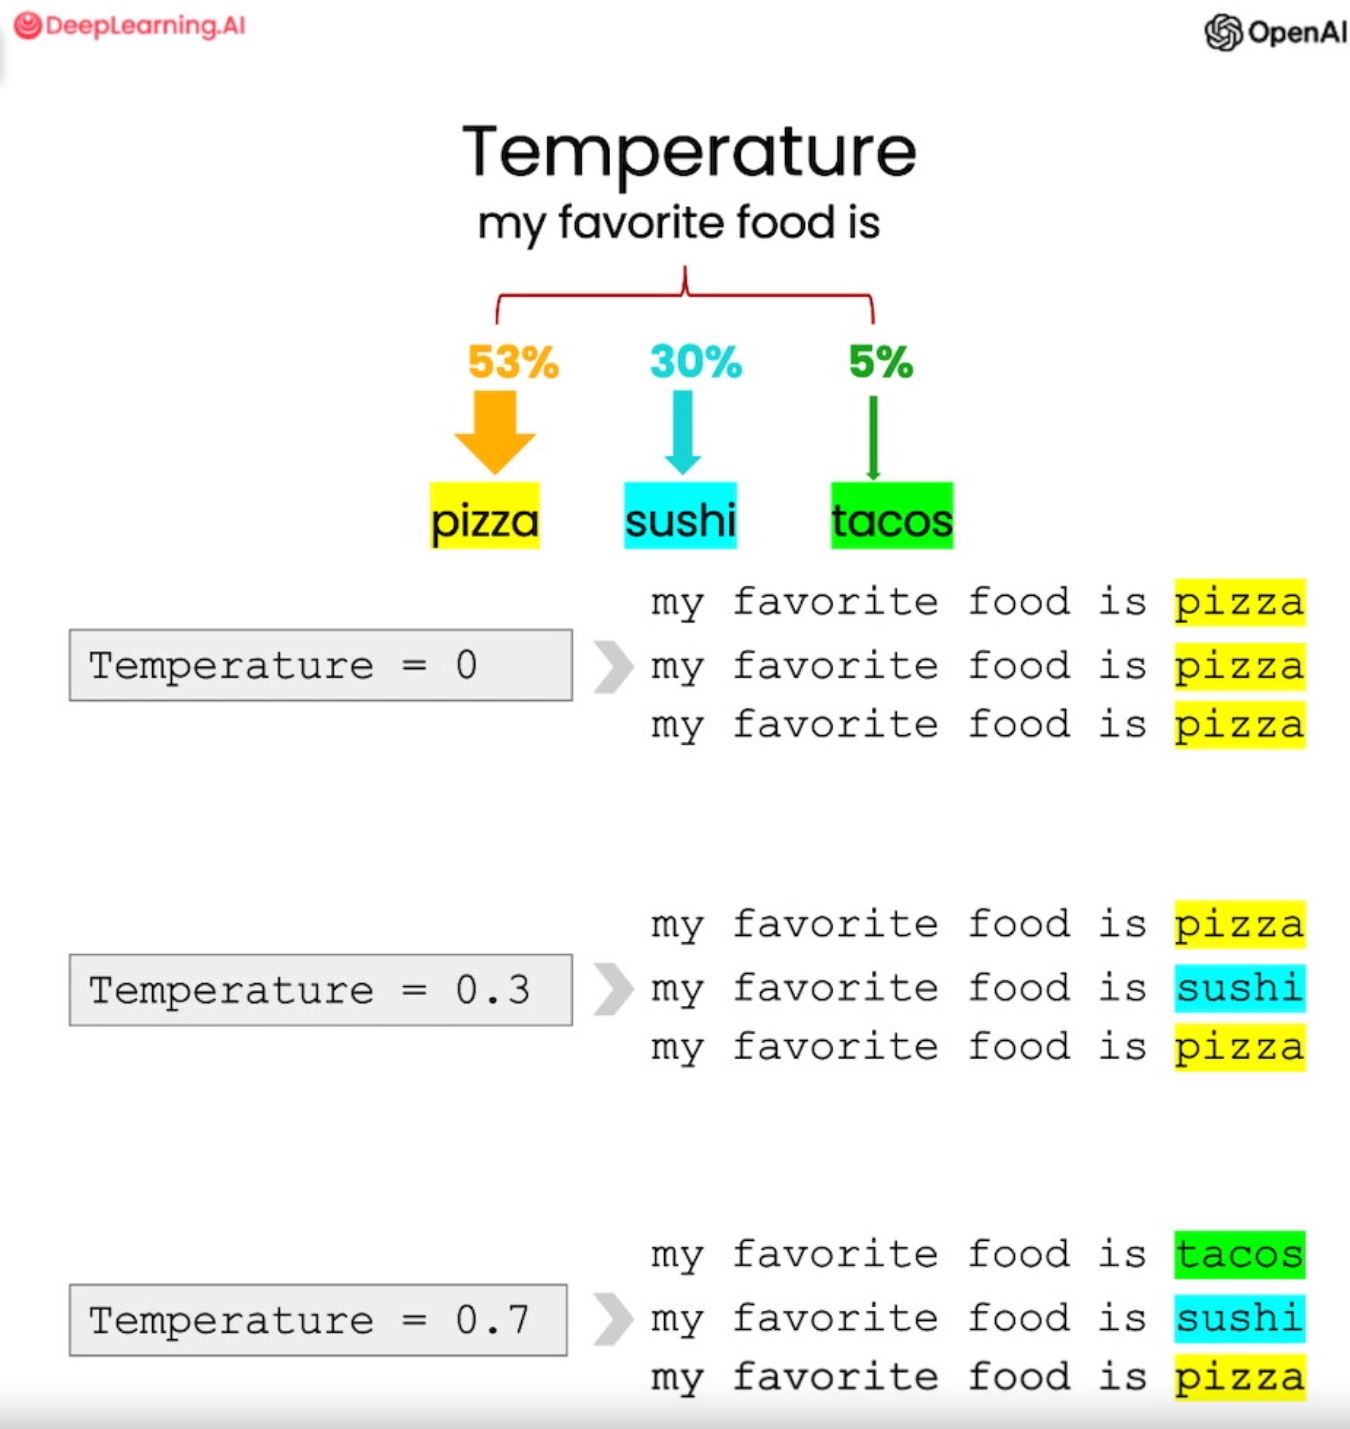

In [81]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response1 = get_completion(prompt, temperature=0.7)
print(response1)

Dear valued customer,

Thank you for taking the time to share your review with us. We appreciate your feedback.

We sincerely apologize for any inconvenience you experienced with the pricing of our 17 piece system. We understand that the sudden increase in price during the second week of December was unexpected and frustrating. We strive to provide consistent and fair pricing to all our customers, and we apologize if this was not reflected in your recent purchase.

Regarding the base of the system, we appreciate your feedback about the locking mechanism. We constantly strive to improve our products based on customer feedback, and we will take your comments into consideration for future enhancements.

We are sorry to hear about the issue with the motor making a funny noise after a year. We understand that it must have been disappointing to find out that the warranty had expired. If you have any further concerns or require assistance, please do not hesitate to reach out to our customer s

In [82]:
response2 = get_completion(prompt, temperature=0.7)
print(response2)

Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and are sorry to hear about your experience with the pricing and the quality of the 17 piece system.

We apologize for any inconvenience caused by the increase in prices during the second week of December. Our aim is to provide fair and competitive pricing for our customers. We understand your disappointment, and we value your loyalty to our brand.

Regarding the issue with the base of the system, we apologize for any dissatisfaction caused. We strive to maintain high-quality standards, and we appreciate your feedback on this matter. We will take your comments into consideration for future improvements.

If you have any further concerns or questions, we recommend reaching out to our customer service department. They will be happy to assist you and address any issues you may have.

Thank you once again for your review. We value your feedback as it helps us improve our products 

In [83]:
diff = Redlines(response1,response2)
display(Markdown(diff.output_markdown))

Dear <span style='color:red;font-weight:700;text-decoration:line-through;'>valued customer, </span><span style='color:green;font-weight:700;'>Valued Customer, </span>

Thank you for taking the time to share your review with us. We appreciate your <span style='color:red;font-weight:700;text-decoration:line-through;'>feedback. </span><span style='color:green;font-weight:700;'>feedback and are sorry to hear about your experience with the pricing and the quality of the 17 piece system. </span>

We <span style='color:red;font-weight:700;text-decoration:line-through;'>sincerely </span>apologize for any inconvenience <span style='color:red;font-weight:700;text-decoration:line-through;'>you experienced with </span><span style='color:green;font-weight:700;'>caused by </span>the <span style='color:red;font-weight:700;text-decoration:line-through;'>pricing of our 17 piece system. We understand that the sudden </span>increase in <span style='color:red;font-weight:700;text-decoration:line-through;'>price </span><span style='color:green;font-weight:700;'>prices </span>during the second week of <span style='color:red;font-weight:700;text-decoration:line-through;'>December was unexpected and frustrating. We strive </span><span style='color:green;font-weight:700;'>December. Our aim is </span>to provide <span style='color:red;font-weight:700;text-decoration:line-through;'>consistent </span><span style='color:green;font-weight:700;'>fair </span>and <span style='color:red;font-weight:700;text-decoration:line-through;'>fair </span><span style='color:green;font-weight:700;'>competitive </span>pricing <span style='color:red;font-weight:700;text-decoration:line-through;'>to all </span><span style='color:green;font-weight:700;'>for </span>our <span style='color:red;font-weight:700;text-decoration:line-through;'>customers, </span><span style='color:green;font-weight:700;'>customers. We understand your disappointment, </span>and we <span style='color:red;font-weight:700;text-decoration:line-through;'>apologize if this was not reflected in </span><span style='color:green;font-weight:700;'>value </span>your <span style='color:red;font-weight:700;text-decoration:line-through;'>recent purchase. </span><span style='color:green;font-weight:700;'>loyalty to our brand. </span>

Regarding <span style='color:green;font-weight:700;'>the issue with </span>the base of the system, we <span style='color:green;font-weight:700;'>apologize for any dissatisfaction caused. We strive to maintain high-quality standards, and we </span>appreciate your feedback <span style='color:red;font-weight:700;text-decoration:line-through;'>about the locking mechanism. </span><span style='color:green;font-weight:700;'>on this matter. </span>We <span style='color:red;font-weight:700;text-decoration:line-through;'>constantly strive to improve our products based on customer feedback, and we </span>will take your comments into consideration for future <span style='color:red;font-weight:700;text-decoration:line-through;'>enhancements. </span><span style='color:green;font-weight:700;'>improvements. </span>

<span style='color:red;font-weight:700;text-decoration:line-through;'>We are sorry to hear about the issue with the motor making a funny noise after a year. We understand that it must have been disappointing to find out that the warranty had expired. </span>If you have any further concerns or <span style='color:red;font-weight:700;text-decoration:line-through;'>require assistance, please do not hesitate to reach </span><span style='color:green;font-weight:700;'>questions, we recommend reaching </span>out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team. </span><span style='color:green;font-weight:700;'>department. </span>They will be <span style='color:red;font-weight:700;text-decoration:line-through;'>more than </span>happy to assist you <span style='color:red;font-weight:700;text-decoration:line-through;'>further. </span><span style='color:green;font-weight:700;'>and address any issues you may have. </span>

Thank you once again for your <span style='color:red;font-weight:700;text-decoration:line-through;'>review and for choosing our products. </span><span style='color:green;font-weight:700;'>review. </span>We value your <span style='color:red;font-weight:700;text-decoration:line-through;'>loyalty and will continue to work towards providing the best quality </span><span style='color:green;font-weight:700;'>feedback as it helps us improve our </span>products and <span style='color:red;font-weight:700;text-decoration:line-through;'>service. </span><span style='color:green;font-weight:700;'>services. We hope to have the opportunity to serve you better in the future. </span>

Best regards, 

AI customer agent

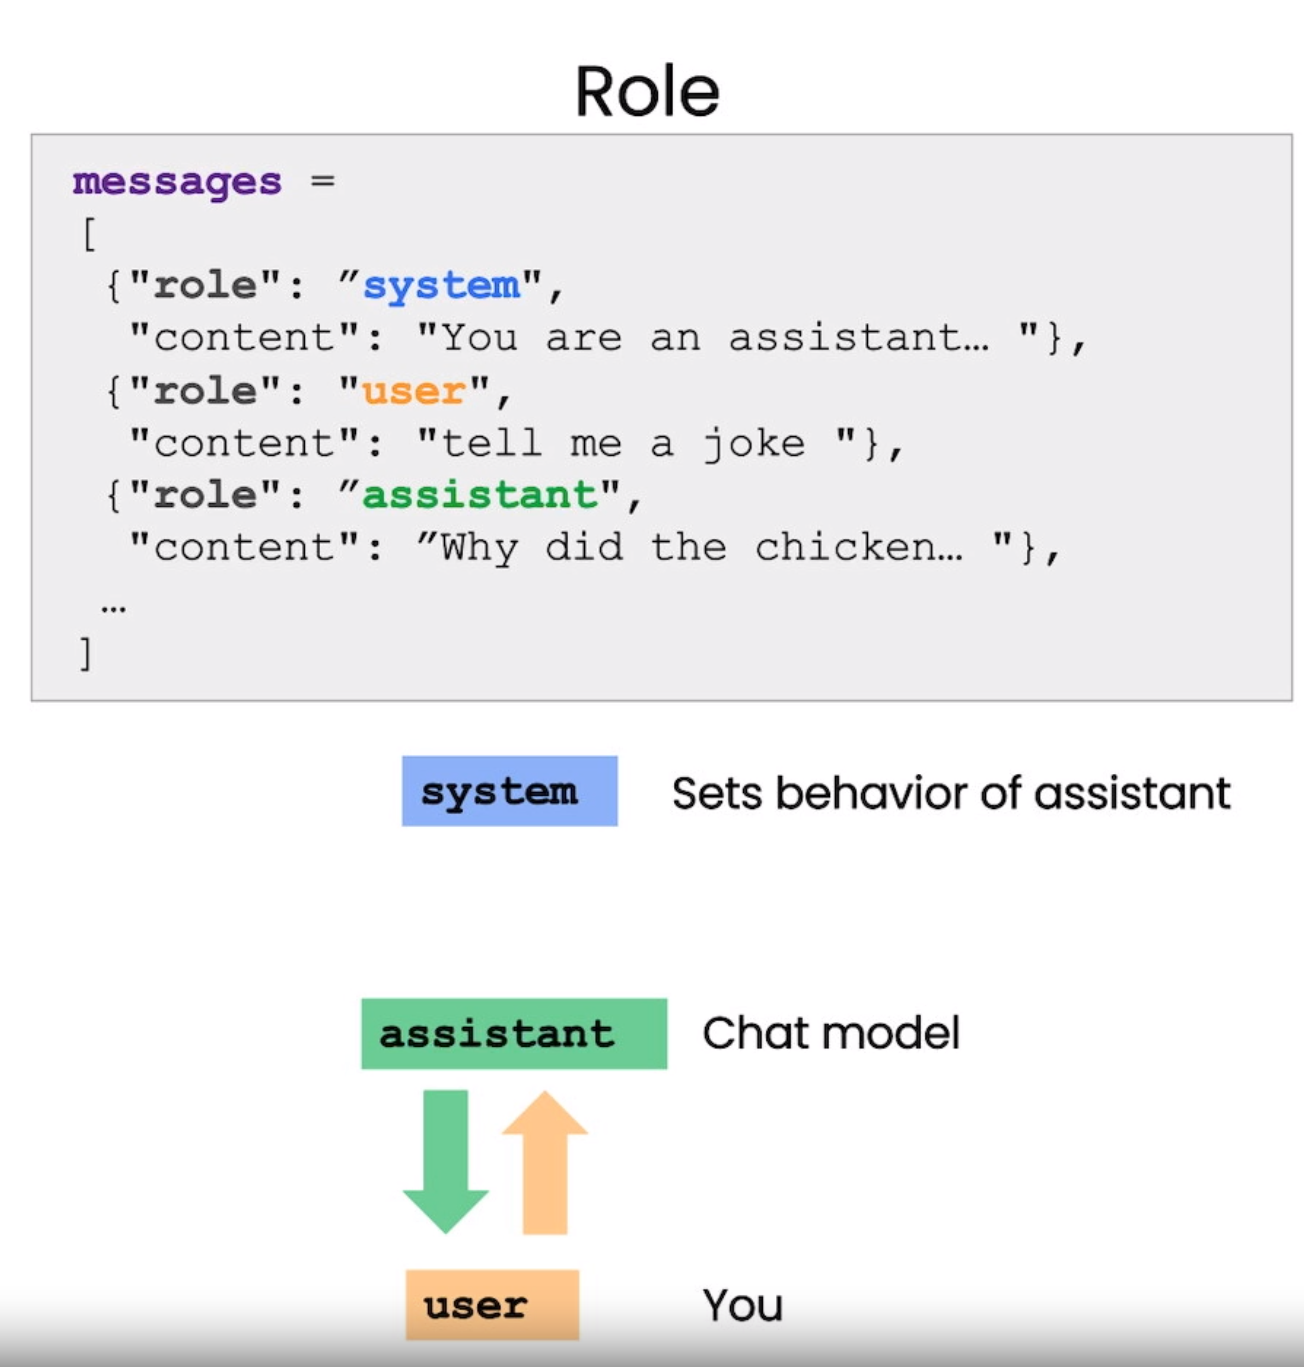

In [92]:
def get_completion(prompt, model="gpt-3.5-turbo",temperature = 0):
    messages = [{"role": "user", "content": prompt}]
    completion = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return completion.choices[0].message.content


def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message.content

In [93]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

In [94]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

Verily, to get to the other side, where there is less peril and to wander through green meadows to peck upon grains of gold.


In [95]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Isa! It's nice to meet you. How can I assist you today?


### Messages provide context and history

In [96]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

I'm sorry, but as a chatbot, I don't have access to personal information or memory. Therefore, I don't know your name.


In [97]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Your name is Isa.


# OrderBot
We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant. 

In [98]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)


In [99]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, height=300, loading_indicator=True)

In [100]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0)
print(response)

{
  "pizza": {
    "type": "cheese",
    "size": "small",
    "price": 6.50
  },
  "toppings": [],
  "drinks": [],
  "sides": [],
  "total_price": 6.50
}
